## Load useful libraries

In [1]:
import librosa
import matplotlib.pyplot as plt

In [2]:
from music_production_and_performance.features.key_detection import compute_chromagram
from music_production_and_performance.features.key_detection import display_chromagram
from music_production_and_performance.features.key_detection import detect_key_using_chromagram

## User settings

In [3]:
track_to_analyze = '/home/emily/Downloads/Lady Napalm - Voice in the Distance.aiff'

sampling_rate_for_import = 48000
hop_length = 1024

## Set or compute track title

In [4]:
track_title = ''.join(track_to_analyze.split('/')[-1].split('.')[0:-1])
print(track_title)

Lady Napalm - Voice in the Distance


## Do the hop length and sampling rate make sense together?

hop_length / sampling rate be roughly 21 to 23 ms

In [5]:
hop_length / sampling_rate_for_import

0.021333333333333333

## Load an audio file

In [6]:
y, sr = librosa.load(track_to_analyze, sr = 48000)  # we are using a single mono channel here for these analyses
print(sr)
print()
print(y[:10])

48000

[-0.02431686 -0.02839922 -0.03150957 -0.03517893 -0.03209369 -0.02791382
 -0.02182063 -0.02453024 -0.02695906 -0.02552438]


## Separate harmonics and percussives into two waveforms

In [7]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

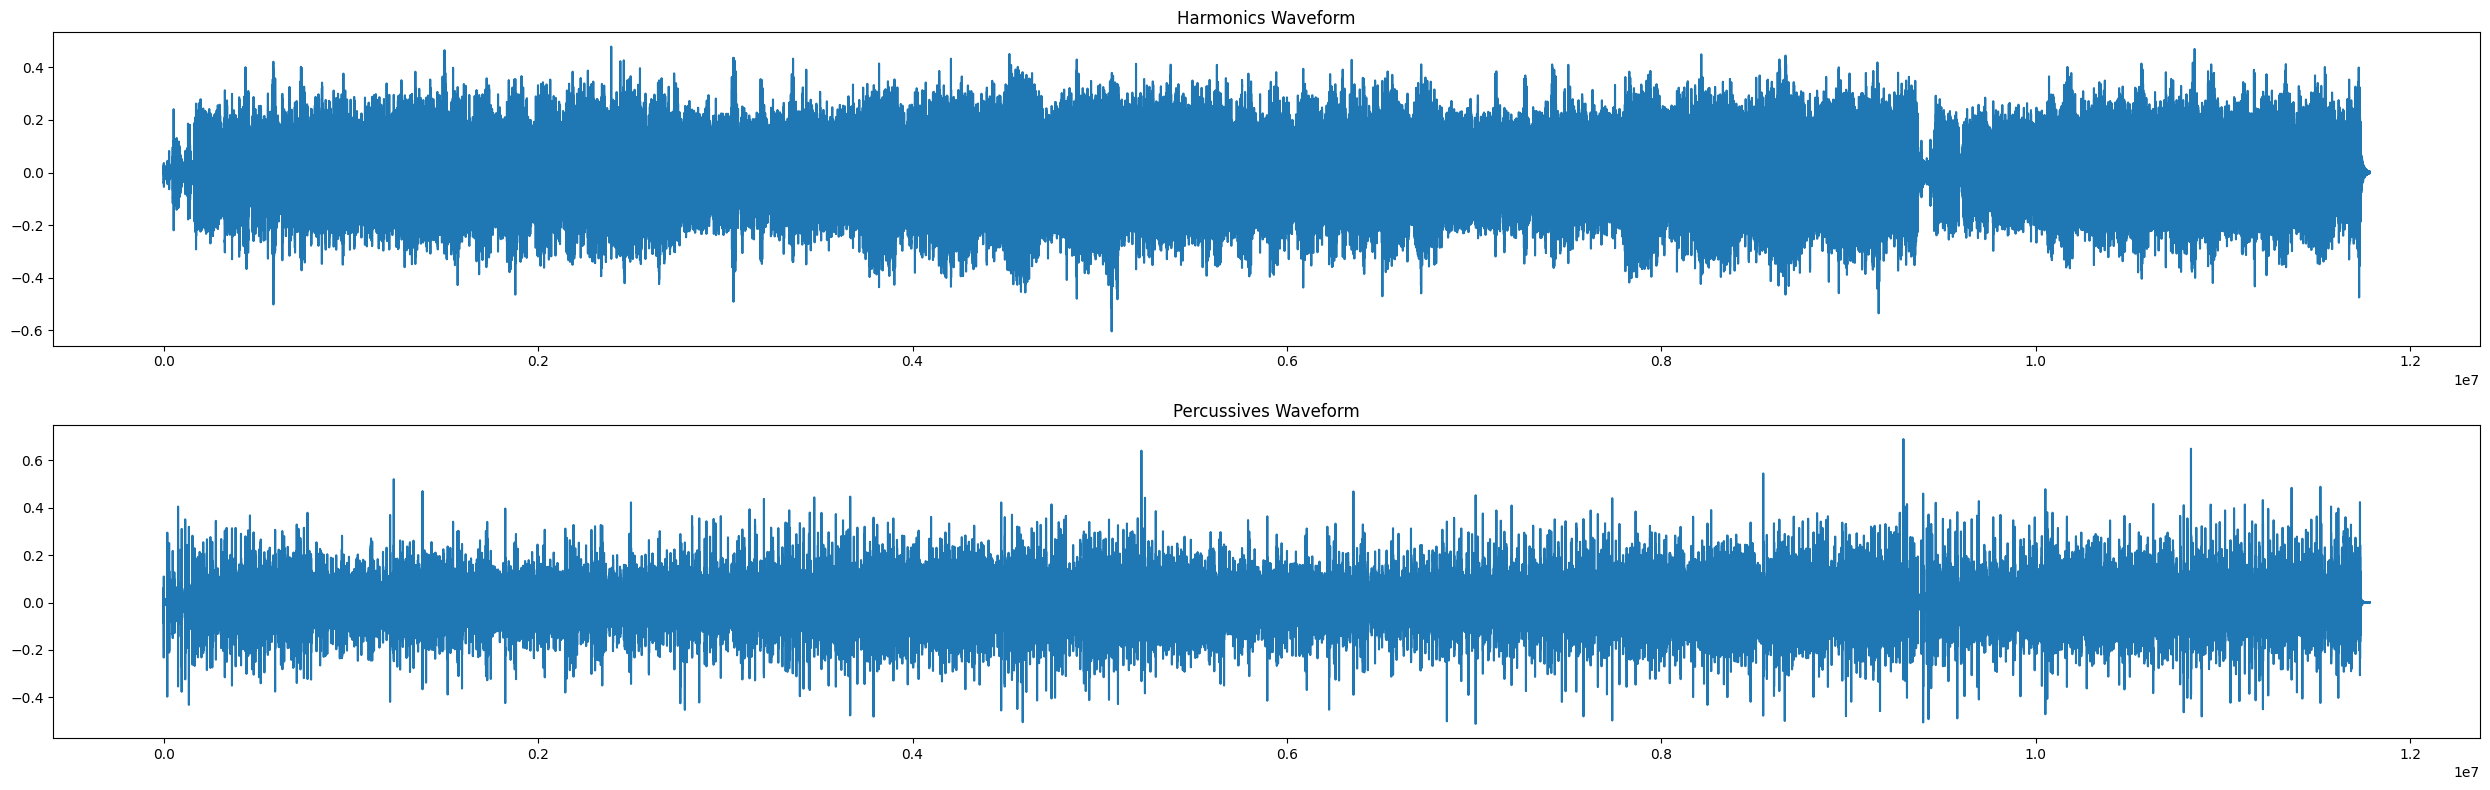

In [8]:
plt.figure(figsize = [25, 8])

plt.subplot(2, 1, 1)
plt.plot(y_harmonic)
plt.title('Harmonics Waveform')
plt.tight_layout()

plt.subplot(2, 1, 2)
plt.plot(y_percussive)
plt.title('Percussives Waveform')
plt.tight_layout()

plt.show()
plt.close()

## Compute and display chromagram

In [9]:
chromagram_stft = compute_chromagram(y_harmonic, sr, hop_length)
chromagram_cqt = compute_chromagram(y_harmonic, sr, hop_length, function_to_use = librosa.feature.chroma_cqt)

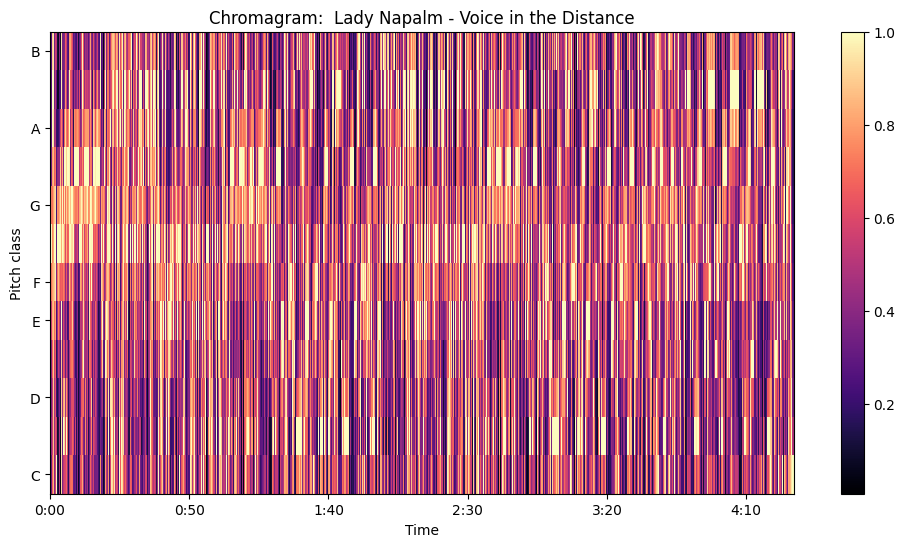

In [10]:
display_chromagram(chromagram_stft, track_title)

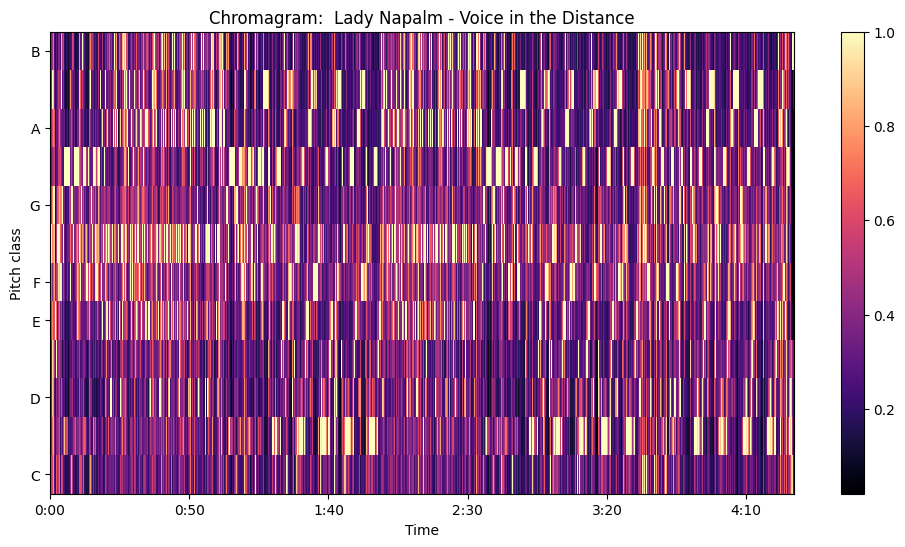

In [11]:
display_chromagram(chromagram_cqt, track_title)

## Estimate the key
Pitch class only, not scale(s) yet:

In [12]:
estimated_key_stft, estimated_key_index_stft = detect_key_using_chromagram(chromagram_stft)
estimated_key_cqt, estimated_key_index_cqt = detect_key_using_chromagram(chromagram_cqt)

print("Detected Key:", estimated_key_stft)
print("Detected Key:", estimated_key_cqt)

Detected Key: F#
Detected Key: F#
